# Задание

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
- 1. satisfaction_level - Уровень удовлетворенности работой
- 2. Last_evaluation - Время с момента последней оценки в годах
- 3. number_projects - Количество проектов, выполненных за время работы
- 4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
- 5. time_spend_company - Стаж работы в компании в годах
- 6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
- 7. left - уволился ли сотрудник
- 8. promotion_last_5years - повышался ли сотрудник за последние пять лет
- 9. department - отдел в котором работает сотрудник
- 10. salary - относительный уровень зарплаты

Требуется выполнить следующее задание:
- 1 Загрузите файл HR.csv в pandas dataframe (5)

- 2 Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение). (10)

- 3 Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные. (10)

- 4 Рассчитайте сколько сотрудников работает в каждом
департаменте. (5)

- 5 Показать распределение сотрудников по зарплатам. (5)

- 6 Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности (5)

- 7 Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом (10)

- 8 Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности) (10): (Доля сотрудников с повышением за последние 5 лет, Средняя степень удовлетворенности, Среднее количество проектов)

- 9 Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки (20)

- 10 Загрузить jupyter notebook с решение на github и прислать ссылку (5)


Итого - максимум 85 баллов
Для зачета необходимо набрать минимум 55

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(7, 5)})

data = pd.read_csv(r'HR.csv')
data.last_evaluation.max()

# Пропуцсков в данных нет, чистить данные от них не требуется
# Типы данных всех стролбцов автоматически привелись верно, дополнительной обработки не требуется

data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


Categorical statistics of Satisfaction level: 

min=0.09
max=1.0
range=0.91
disp=0.06
std=0.25
mean=0.61
median=0.64

iqr=0.38
lower_bound=-0.13
upper_bound=1.39
There are not outliers.



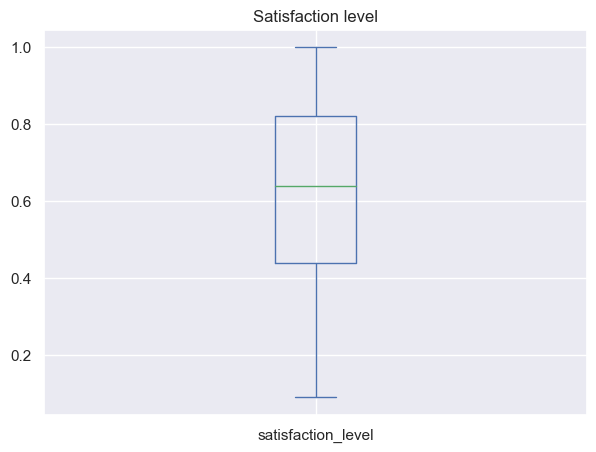

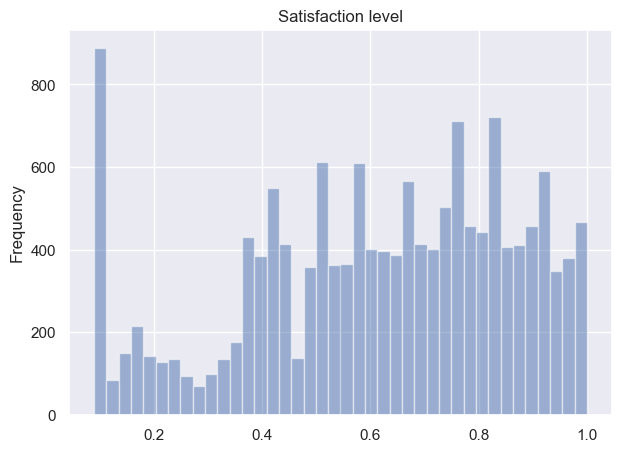

In [2]:
# Рассчет основных статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)
# Для разных типов параметров расчитаем разные статистики. 
# satisfaction_level, last_evaluation, number_projects, average_montly_hours, time_spend_company - количественные
# Work_accident, left, promotion_last_5years, department, salary - категориальные 

def common_quantitative_statistics(sr, name):
    print(f'Categorical statistics of {name}: ')
    print()
    
    min_ = sr.min()
    max_ = sr.max()
    range_ = round(max_ - min_, 2)
    disp = round(sr.var(), 2)
    std = round(sr.std(), 2)
    mean = round(sr.mean(), 2)
    median = round(sr.quantile(), 2)
    
    print(f'min={min_}')
    print(f'max={max_}')
    print(f'range={range_}')
    print(f'disp={disp}')
    print(f'std={std}')
    print(f'mean={mean}')
    print(f'median={median}')
    
    iqr = sr.quantile(0.75) - sr.quantile(0.25)
    lower_bound = round(sr.quantile(0.25) - (1.5 * iqr), 2)
    upper_bound = round(sr.quantile(0.75) + (1.5 * iqr), 2)

    outliers = [x for x in sr if x < lower_bound or x > upper_bound]
    
    print()
    print(f'iqr={round(iqr, 2)}')
    print(f'lower_bound={lower_bound}')
    print(f'upper_bound={upper_bound}')
    
    if len(outliers) == 0:
        print('There are not outliers.')
    elif len(outliers) < 15:
        print(f'outliers={outliers}')
    else:
        print(f'count outliers={len(outliers)}')
        print(f'unique outliers={set(outliers)}')
    print()
    
    sr.plot(kind='box',title=name, grid=True)
    plt.show()
    
    sr.plot(kind='hist', alpha = 0.5, bins=40,title=name)
    plt.show()
    
common_quantitative_statistics(data.satisfaction_level, 'Satisfaction level')

Categorical statistics of Last evaluation: 

min=0.36
max=1.0
range=0.64
disp=0.03
std=0.17
mean=0.72
median=0.72

iqr=0.31
lower_bound=0.1
upper_bound=1.34
There are not outliers.



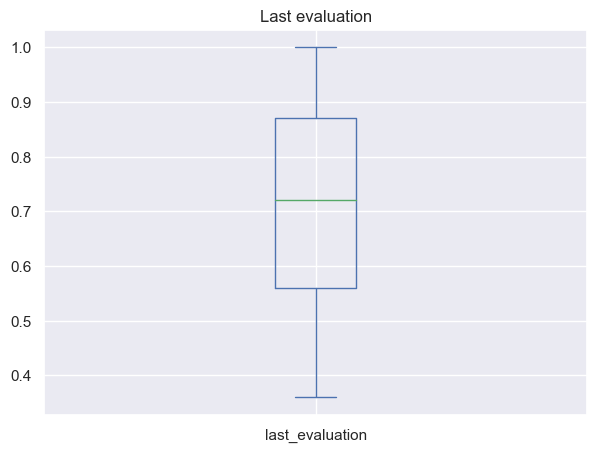

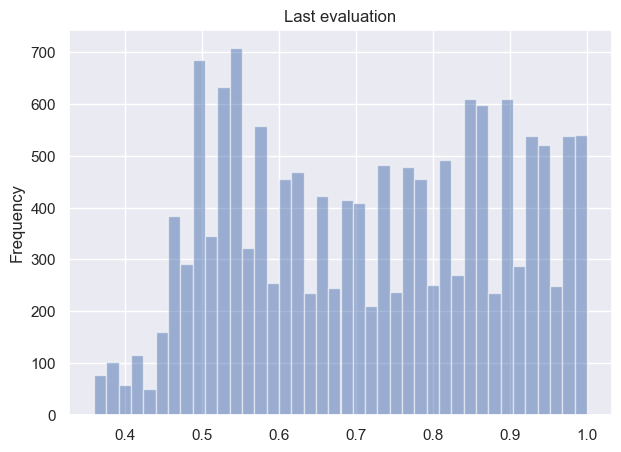

In [3]:
common_quantitative_statistics(data.last_evaluation, 'Last evaluation')

Categorical statistics of Number project: 

min=2
max=7
range=5
disp=1.52
std=1.23
mean=3.8
median=4.0

iqr=2.0
lower_bound=0.0
upper_bound=8.0
There are not outliers.



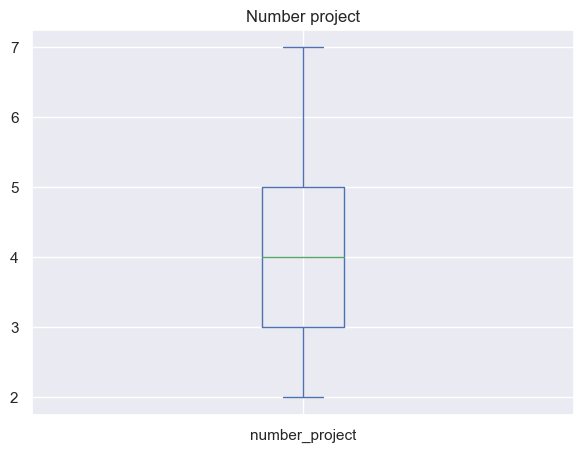

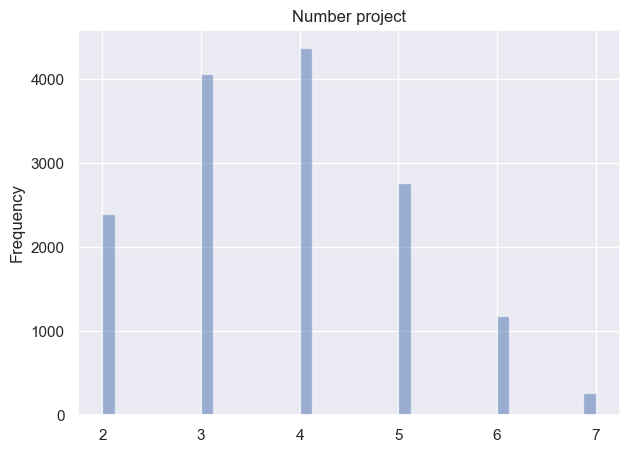

In [4]:
common_quantitative_statistics(data.number_project, 'Number project')

Categorical statistics of Average monthly hours: 

min=96
max=310
range=214
disp=2494.31
std=49.94
mean=201.05
median=200.0

iqr=89.0
lower_bound=22.5
upper_bound=378.5
There are not outliers.



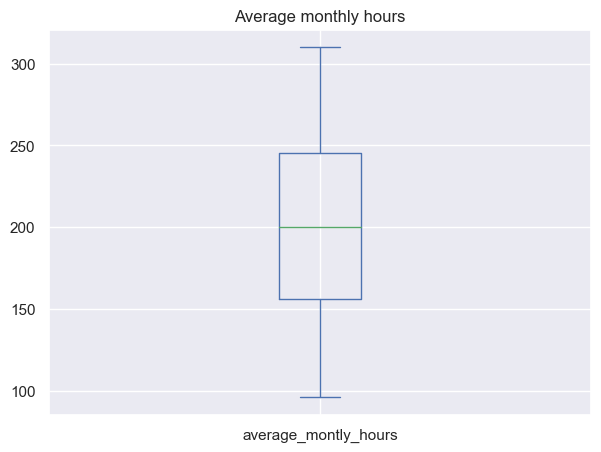

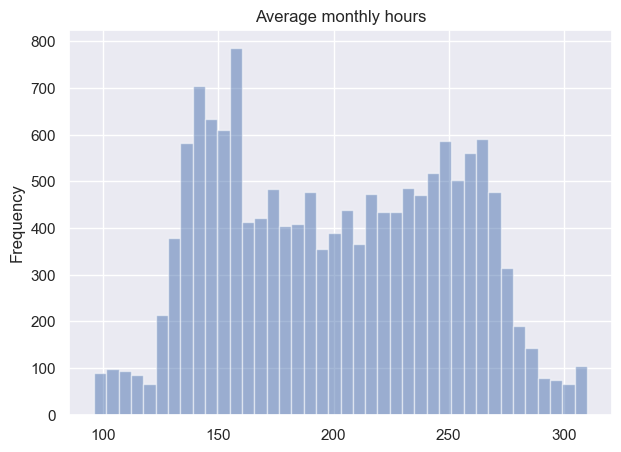

In [5]:
common_quantitative_statistics(data.average_montly_hours, 'Average monthly hours')

Categorical statistics of Time spend company: 

min=2
max=10
range=8
disp=2.13
std=1.46
mean=3.5
median=3.0

iqr=1.0
lower_bound=1.5
upper_bound=5.5
count outliers=1282
unique outliers={8, 10, 6, 7}



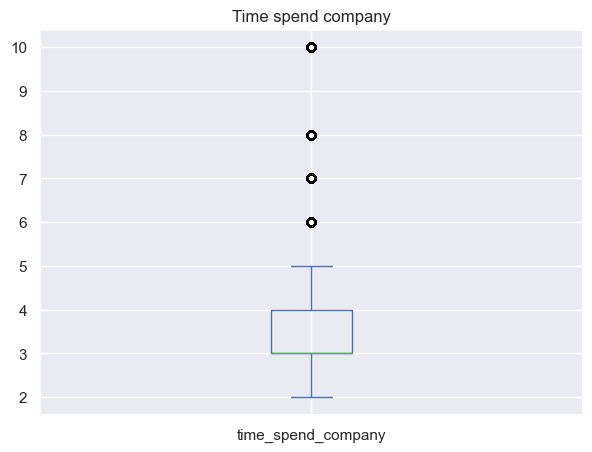

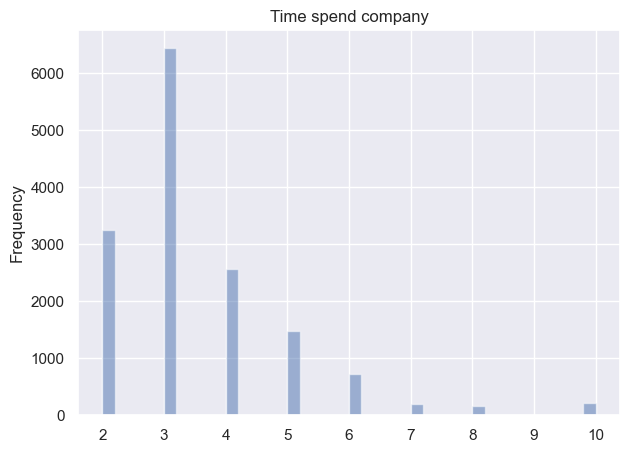

In [6]:
common_quantitative_statistics(data.time_spend_company, 'Time spend company')

Common categorical statistics of Work accident:
mode=0
unique values=[0 1]


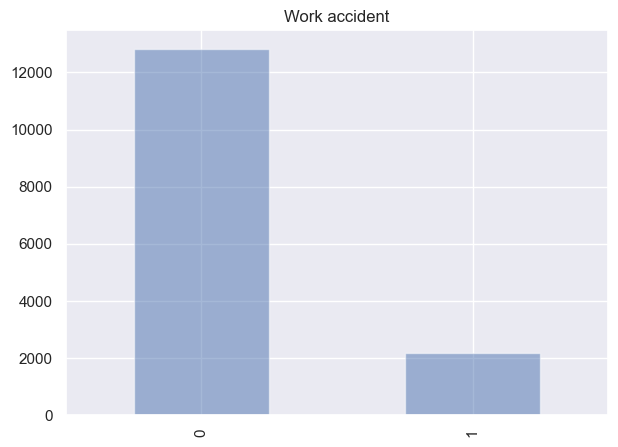

In [7]:
def common_categorical_statistics(sr, name):
    print(f'Common categorical statistics of {name}:')
    
    mode = sr.mode()[0]
    print(f'mode={mode}')
    
    print(f'unique values={sr.unique()}')
    
    sr.value_counts().plot(kind='bar', alpha = 0.5, title=name)
    plt.show()
    
common_categorical_statistics(data.Work_accident, 'Work accident')

Common categorical statistics of left:
mode=0
unique values=[1 0]


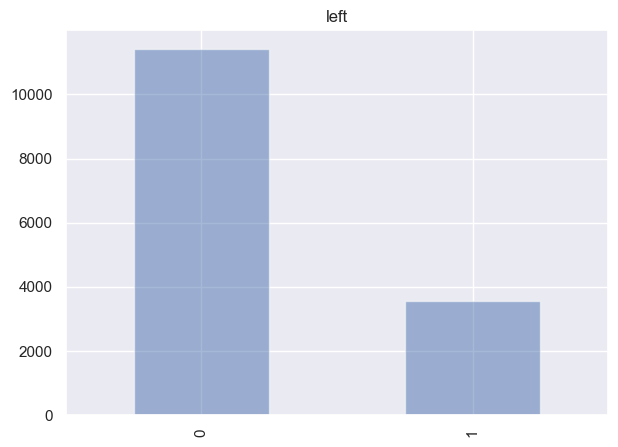

In [8]:
common_categorical_statistics(data.left, 'left')

Common categorical statistics of promotion_last_5years:
mode=0
unique values=[0 1]


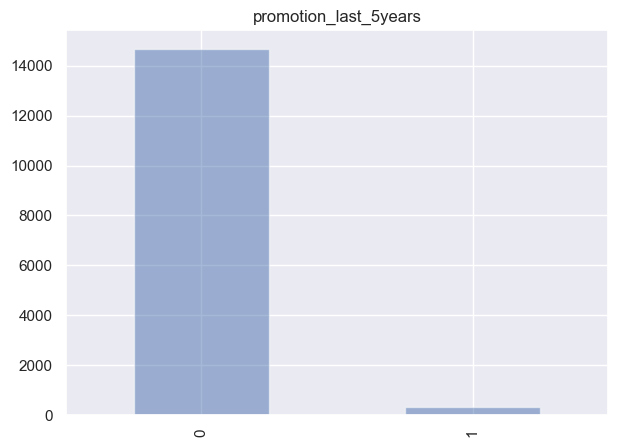

In [9]:
common_categorical_statistics(data.promotion_last_5years, 'promotion_last_5years')

Common categorical statistics of department:
mode=sales
unique values=['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


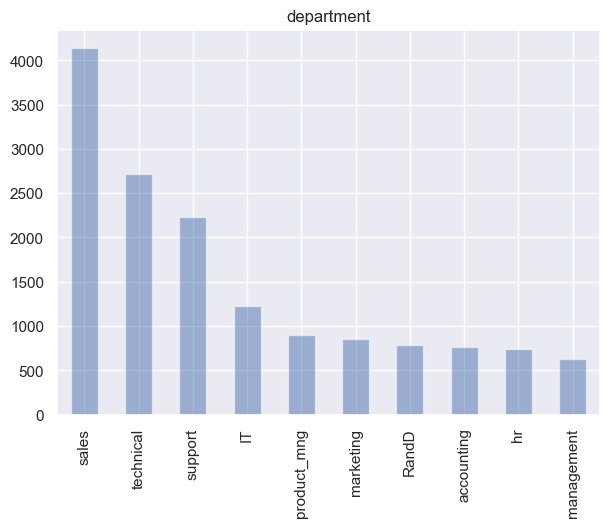

In [10]:
common_categorical_statistics(data.department, 'department')

Common categorical statistics of salary:
mode=low
unique values=['low' 'medium' 'high']


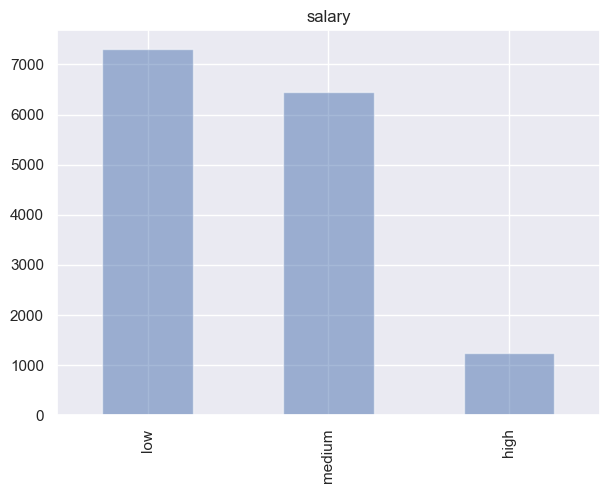

In [11]:
common_categorical_statistics(data.salary, 'salary')

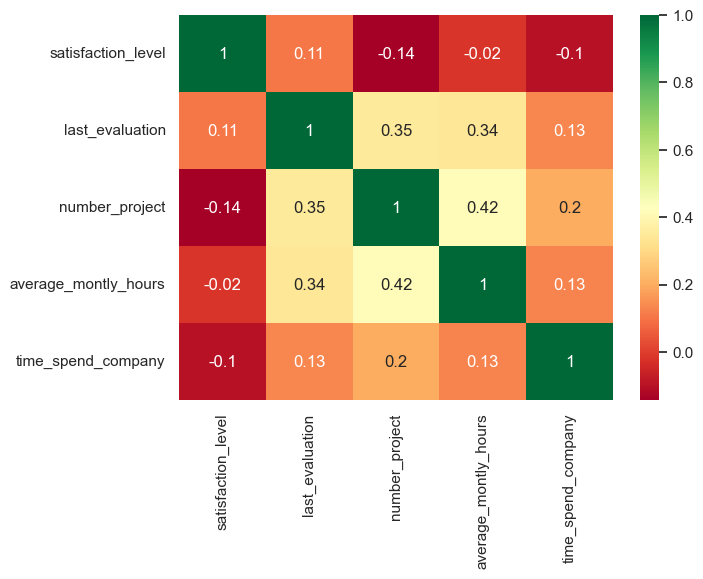

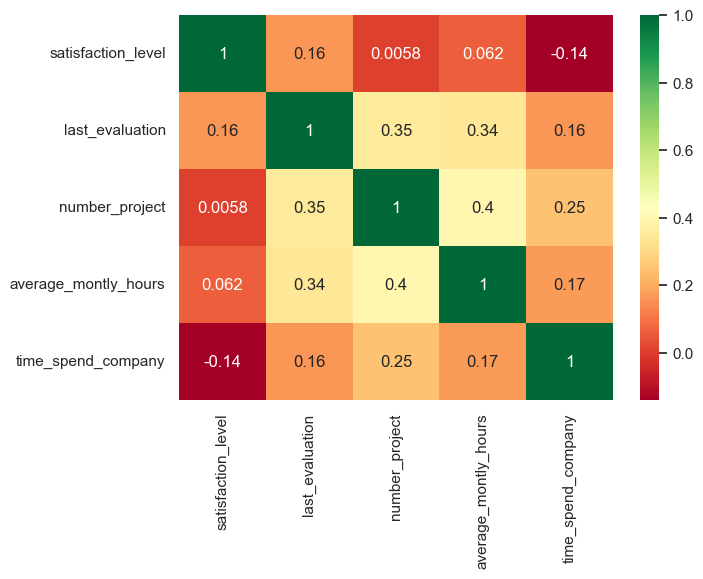

In [12]:
# Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. 
# Определите две самые скоррелированные и две наименее скоррелированные переменные

# satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company - количественные

# расчитаем попарно коэффициенты Пирсона и Спирмена, 
# но с Пирсена могут быть не точности, так как распредкеления у параметров не нормальные

# Вообще, стоило бы почистить от выбросов, но один параметр имеет выбросы по расчетам - time_spend_company, но логически 
# эти выбросы не далеки от основной массы и это не единичные случаи - дамаю надо рассматривать данные целиком.

data_for_corr = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]

# считаем коэф. корреляции Пирсона (визуализируем тепловой картой)
sns.heatmap(data_for_corr.corr(), annot=True, cmap='RdYlGn')
plt.show()

# считаем коэф. корреляции Спирмана
sns.heatmap(data_for_corr.corr(method='spearman'), annot=True, cmap='RdYlGn')
plt.show()

# Видим, самые 2 скорррелированные пары
# average_montly_hours и number_project (0.42 по Пирсену и 0.4 по Спирмана) - прямая зависимость
# last_evaluation и number_project (0.35 по Пирсену и 0.35 по Спирмана) - прямая зависимость

# Самые 2 не скеррелировнные пары (самые блищкием к 0) (тут Пирсен и Спирман расходятся, возьмет за осному Спирман)
# satisfaction_level и number_project (-0.14 П и 0.0058 С)
# satisfaction_level и average_montly_hours (-0.02 П и 0.0062 С)

# Но все эти значения кореляции довольно низкие, что бы признать какую нибудь линейную связь между любыми парами

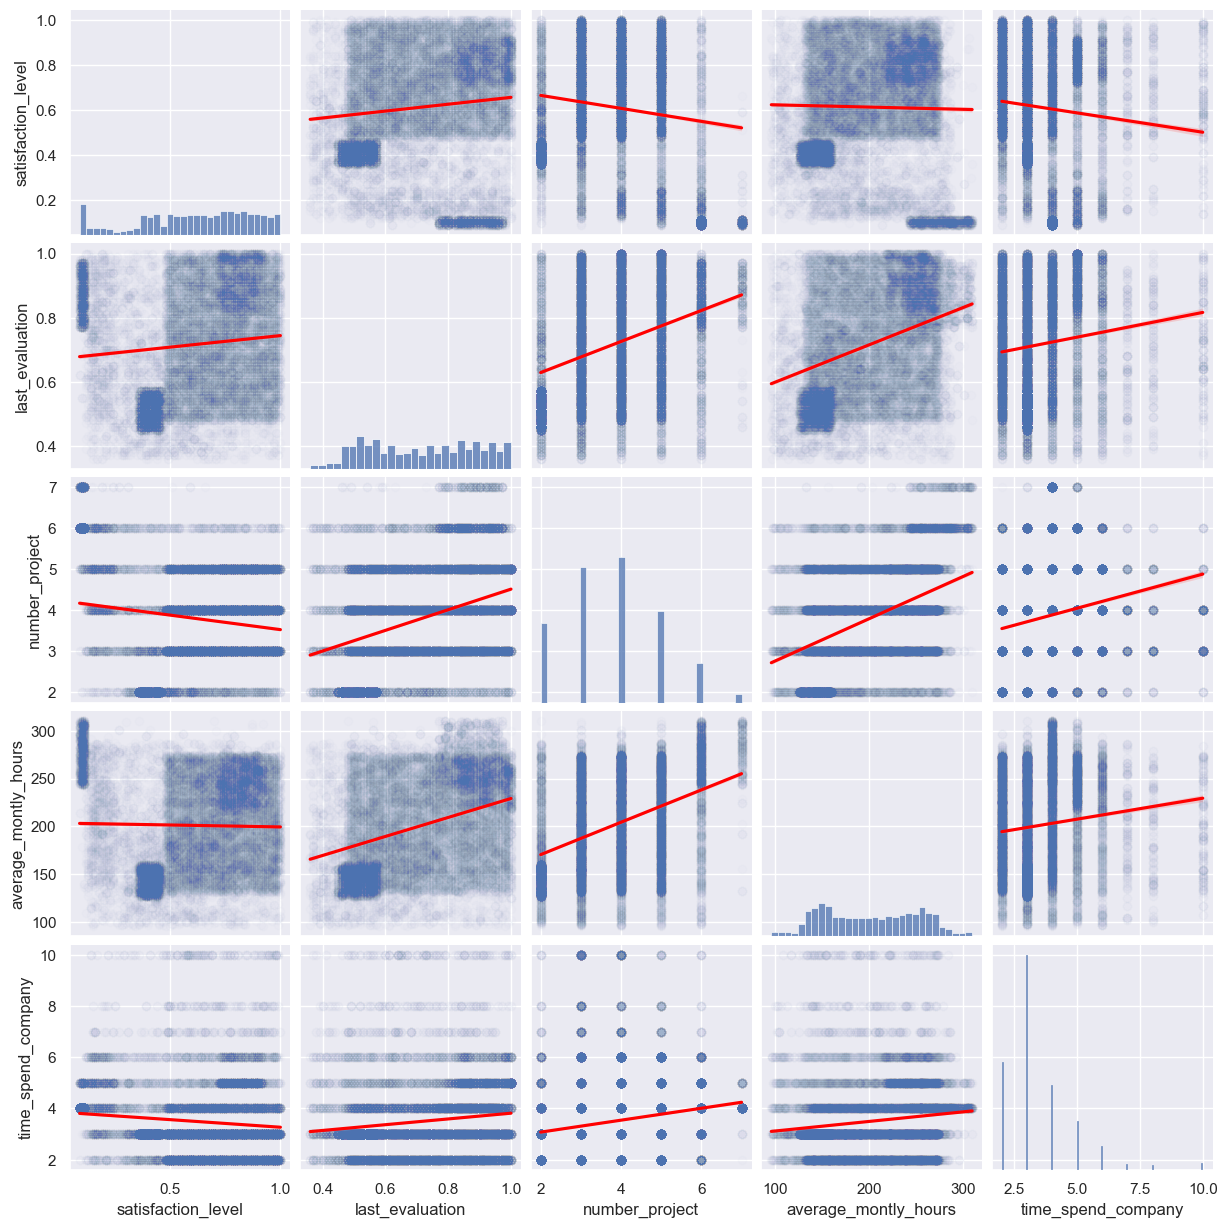

In [13]:
# Можем так же посмотреть парные графики зависимостей и убедится, что какой либо значивой связи между парами нет
sns.pairplot(
    data_for_corr,
    kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.01}})
plt.show()

In [14]:
# Рассчитайте сколько сотрудников работает в каждом департаменте
data.groupby('department').size()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

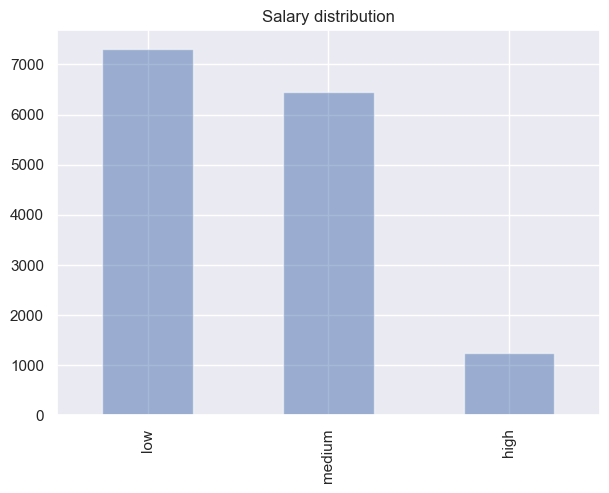

In [15]:
# Показать распределение сотрудников по зарплатам

data.salary.value_counts().plot(kind='bar', alpha = 0.5, title='Salary distribution')
plt.show()

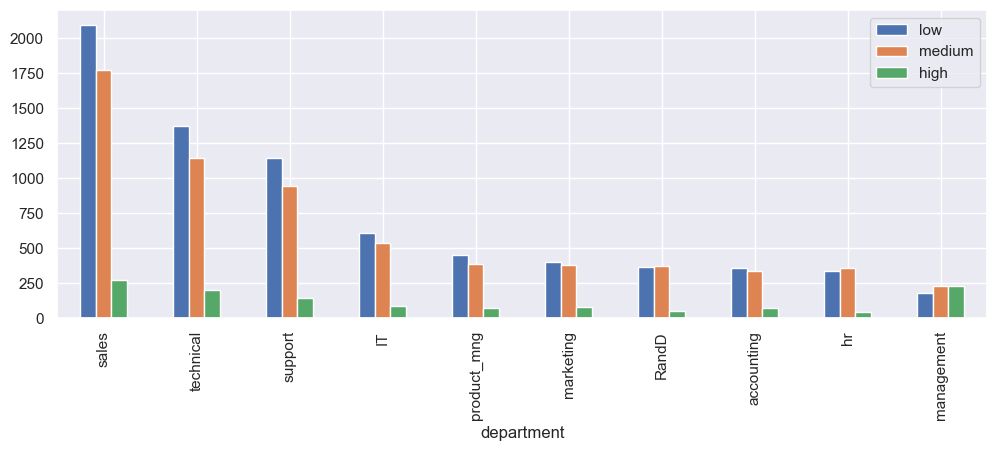

In [16]:
# Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

data
salary_by_department = pd.pivot_table(
    data, 
    index='department', 
    columns='salary', 
    aggfunc='size').sort_values('low', ascending=False)


salary_by_department[['low', 'medium', 'high']].plot(kind='bar', figsize=(12, 4))
plt.legend(loc='upper right')
plt.show()

Categorical statistics of Average montly hours for low salary: 

min=96
max=310
range=214
disp=2583.91
std=50.83
mean=201.0
median=199.0

iqr=91.0
lower_bound=18.5
upper_bound=382.5
There are not outliers.



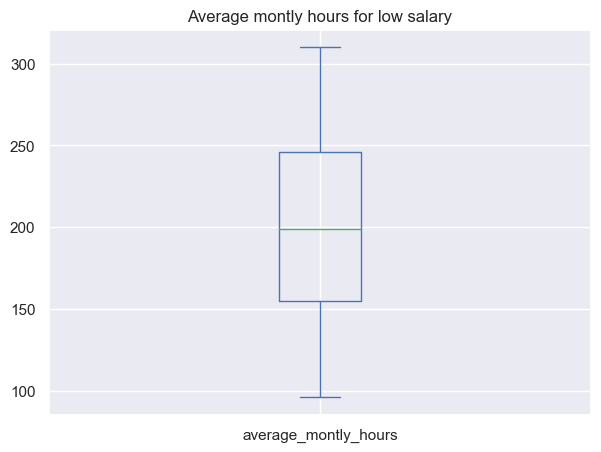

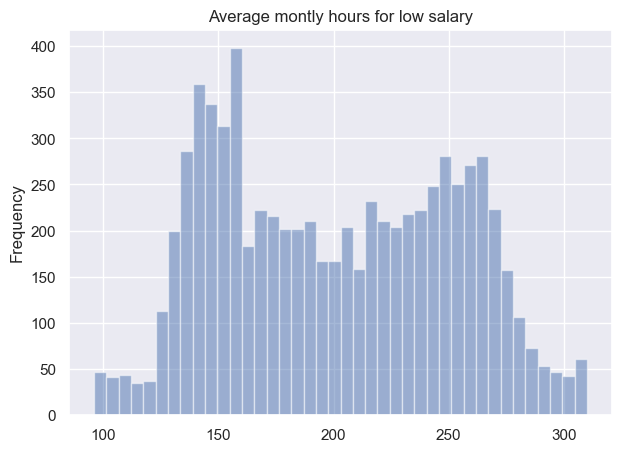

In [17]:
# Проверить гипотезу, что сотрудники с высоким окладом
# проводят на работе больше времени, чем сотрудники с низким
# окладом

average_montly_hours_low = data[data.salary == 'low'].average_montly_hours
average_montly_hours_high = data[data.salary == 'high'].average_montly_hours

# Посмотрим на свойства этих выборок
common_quantitative_statistics(average_montly_hours_low, 'Average montly hours for low salary')


Categorical statistics of Average montly hours for high salary: 

min=96
max=307
range=211
disp=2276.29
std=47.71
mean=199.87
median=199.0

iqr=80.0
lower_bound=41.0
upper_bound=361.0
There are not outliers.



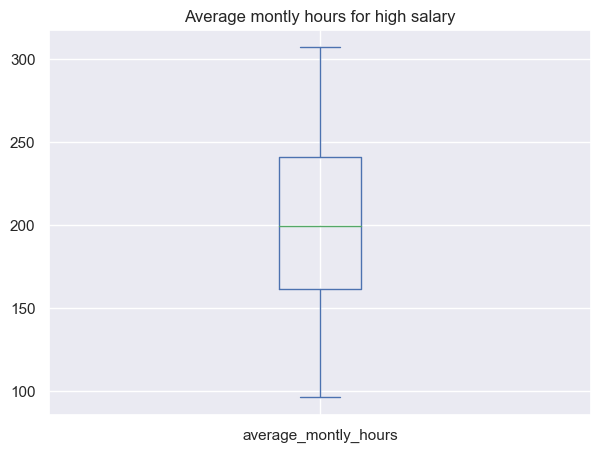

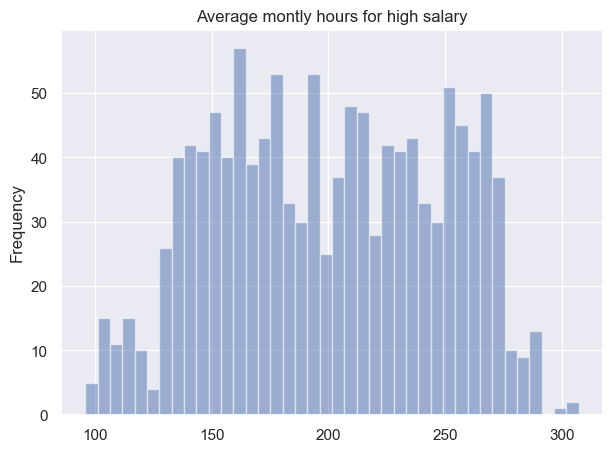

In [18]:
common_quantitative_statistics(average_montly_hours_high, 'Average montly hours for high salary')

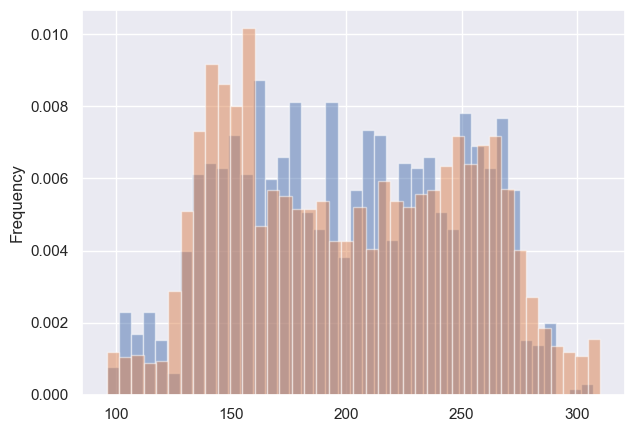

In [19]:
# видим, что дисперсия и средние значения довольно похожи
# распределение явно не является нормальным
# одна выборка больше другой

# сравним их гистограмы, сделав поправку на разницу объемов выборки
average_montly_hours_high.plot(kind='hist', alpha = 0.5, density = True, bins=40)
average_montly_hours_low.plot(kind='hist', alpha = 0.5, density = True, bins=40)
plt.show()

In [20]:
# вызуально не видно, что есть статичтически значимая разница, но все проверим это научно:)
# Нулевая гипотиза в том, что статистически значимой разницы нет. Проверим, сможем ли мы ее отклонить 
# c уровнем доверия 0.95 (возьмем такой, так как он наиболее распространена в сферах, где ошибиться не критично)

# так как это не прерывные данные и распределение не нормальное, наблюднения можно проранжировать, и выборки не зависимы
# Выберем тест Манна-Уитни. 

# обнако, для его примерения нужны выборки одинакового размера. 

np.random.seed(67)  # Закрепим seed для воспроизводимости результата.
common_count = min(average_montly_hours_low.count(), average_montly_hours_high.count())

average_montly_hours_low_norm = average_montly_hours_low.sample(common_count)
average_montly_hours_high_norm = average_montly_hours_high.sample(common_count)

# теперь выборки у нас одинакового размера. 

In [23]:
import scipy.stats as st

stat, p = st.mannwhitneyu(average_montly_hours_low_norm, average_montly_hours_high_norm)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')
    
# C уровнем доверия 95% (уровень значимости 5%) делаем вывод, что статистически значимой разницы между выборками нет

Статистика = 762912.50000, p = 0.90271
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


In [24]:
# Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
# - Доля сотрудников с повышением за последние 5 лет
# - Средняя степень удовлетворенности
# - Среднее количество проектов

def calculate_for_group(group, name):
    part_with_promotion = group[group.promotion_last_5years == True].size / group.size
    
    print(f'In group {name}:')
    print(f'Part with promotion is {round(part_with_promotion, 2)}')
    print(f'Mean of satisfaction level is {round(group.satisfaction_level.mean(), 2)}')
    print(f'Mean number project is {round(group.number_project.mean())}')
    print()
    
    
calculate_for_group(data[data.left == True], 'Staff left')
calculate_for_group(data[data.left == False], 'Staff not left')

In group Staff left:
Part with promotion is 0.01
Mean of satisfaction level is 0.44
Mean number project is 4

In group Staff not left:
Part with promotion is 0.03
Mean of satisfaction level is 0.67
Mean number project is 4



In [25]:
# Разделить данные на тестовую и обучающую выборки
# Построить модель LDA, предсказывающую уволился ли
# сотрудник на основе имеющихся факторов (кроме department и
# salary)
# Оценить качество модели на тестовой выборки

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# уберем из дадасета department и salary
data_for_learn = data.drop(['department', 'salary'], axis=1)

# разделим данные на тестовую и обучающую выборки
X_train, X_test, y_train, y_test = train_test_split(data_for_learn.drop(['left'], axis=1), data_for_learn['left'], random_state=4)

# построим LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Сравним предсказания с реальными значениями на тестовой выборке
result = pd.DataFrame([list(y_test), lda.predict(X_test)]).T
result.columns = ['left', 'predict']

display(result.head(10))

# Оценим точность предсказания
score = round(accuracy_score(result.left, result.predict), 2)
print(f'Точность предсказания {score}')

,left,predict
0,0,0
1,1,1
2,0,0
3,0,0
4,1,0
5,0,0
6,0,0
7,1,0
8,1,0
9,0,0


Точность предсказания 0.77


In [26]:
# Точно сильно зависит разбиения на тестовую и обучающюю выборки. 
# проведем эксперемент несколько раз и посмотрим на изменение точности

for i in range(10):
    # разделим данные на тестовую и обучающую выборки
    X_train, X_test, y_train, y_test = train_test_split(
        data_for_learn.drop(['left'], axis=1), 
        data_for_learn['left'], 
        random_state=i)
    
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)

    # Оценим точность предсказания
    score = round(accuracy_score(y_test, lda.predict(X_test)), 2)
    print(f'Точность предсказания {score}, random_state={i}')
    

Точность предсказания 0.76, random_state=0
Точность предсказания 0.76, random_state=1
Точность предсказания 0.76, random_state=2
Точность предсказания 0.77, random_state=3
Точность предсказания 0.77, random_state=4
Точность предсказания 0.75, random_state=5
Точность предсказания 0.76, random_state=6
Точность предсказания 0.76, random_state=7
Точность предсказания 0.75, random_state=8
Точность предсказания 0.76, random_state=9


In [27]:
# Выдим, что для наших данных и выбранной можели очность предсказания не сильно колеблится в зависимости от выборки